<a href="https://colab.research.google.com/github/Aleju19/Aprendizaje-Automatico-2026/blob/main/4_1_Medidas_de_Similitud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 4.1: Taller de Medidas de Similitud y Disimilitud**


## OBJETIVOS DEL TALLER:
Comprender y aplicar diferentes medidas de similitud y disimilitud en conjuntos de datos, analizando su comportamiento en distintos contextos de distribución de datos. Implementar y calcular al menos 6 medidas de distancia diferentes:

* ✅Distancia Euclidiana (L2)
* ✅Distancia Manhattan (L1)
* ✅Distancia Chebyshev (L∞)
* ✅Similitud de Coseno
* ✅Distancia de Mahalanobis
* ✅Distancia de Jaccard

Representar gráficamente datasets en espacios bidimensionales

* ✅Visualizar centros y puntos de referencia en gráficos de dispersión
* ✅Interpretar relaciones espaciales a partir de representaciones visuales

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [2]:
import scipy.stats as st

def visualize_dataset(x, y, ds_center, c1, c2):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ds_center_r = [np.mean(x), np.mean(y)]
  print(f'Centro real del cluster: x={ds_center_r[0]:.2f}, y={ds_center_r[1]:.2f}')
  print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
  ax.scatter(ds_center[0], ds_center[1], s=200, c='b')
  # plot candidates
  ax.scatter(c1[0], c1[1], s=200, c='r')
  ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('Kernel Gaussiano 2D')

In [3]:
def visualize_scatter(x, y, ds_center, c1, c2):
  ds_center_real= [np.mean(x), np.mean(y)]
  plt.figure(figsize=(8, 6))  # Tamaño del gráfico
  plt.scatter(x, y, color='blue', alpha=0.6, label='Puntos de datos')
  plt.scatter(ds_center[0], ds_center[1], color='red', marker='X', s=100, label='Centro [2, 2]')
  plt.scatter(ds_center_real[0], ds_center_real[1], color='y', marker='X', s=100, label='Centro Real')
  plt.scatter(c1[0], c1[1], s=200, c='red', label='Candidato 1 (rojo)')
  plt.scatter(c2[0], c2[1], s=200, c='green', marker='v', label='Candidato 2 (verde)')
  plt.xlabel('Variable 1 (data_var_1)')
  plt.ylabel('Variable 2 (data_var_2)')
  plt.title('Dataset 2D con Distribución Normal alrededor de [2, 2]')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend()
  plt.show()

# 📁 **CREAR LOS DATASETS Y GRAFIQUE SUS DISTRIBUCIONES**

In [4]:
# Crear un dataset artificial alrededor de un punto
def cargar_datasetDistNormal(n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generamos los puntox en 2D con funcion normal, al rededor del centro
    data_var_1 = np.random.randn(n_data_points) + ds_center[0]
    data_var_2 = np.random.randn(n_data_points) + ds_center[1]
    return data_var_1, data_var_2

In [5]:
# Crear un dataset artificial alrededor de un punto con una relacion lineal de dependencia entre las variables
def cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generar los datos con una relacion lineal
    data_var_1b = factor[0] * np.random.randn(n_data_points) + ds_center[0]
    data_var_2b = data_var_1b + factor[1] * np.random.randn(n_data_points)
    return data_var_1b, data_var_2b

In [6]:
# Crear un dataset artificial alrededor de un punto con una relacion cuadratica de dependencia entre las variables
def cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]),
                                     n_data_points=50,
                                     rango_x=(-5, 5)):
    #coeficientes : array de 3 elementos [a, b, c]
    #    Coeficientes de la ecuación cuadrática: y = a*x² + b*x + c
    # Para hacer los experimentos reproducibles
    np.random.seed(42)
    # Extraer coeficientes
    a, b, c = coeficientes
    # Generar valores x uniformemente distribuidos
    x = np.random.uniform(rango_x[0], rango_x[1], n_data_points)
    # Aplicar la transformación cuadrática
    y_ideal = a * x**2 + b * x + c
    # Añadir ruido aleatorio (proporcional al rango de y)
    rango_y = np.max(y_ideal) - np.min(y_ideal)
    ruido = 0.1 * rango_y * np.random.randn(n_data_points)
    y = y_ideal + ruido
    return x, y

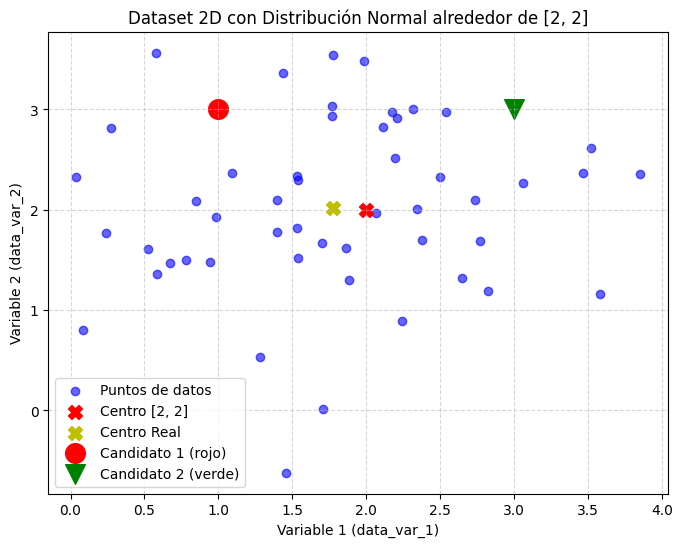

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


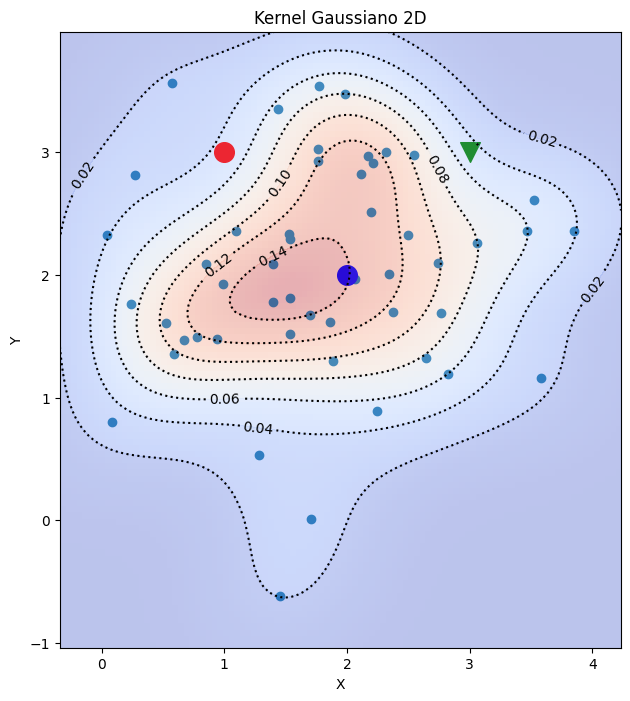

In [7]:
# Cargar dataset
ds_center = np.array([2, 2])
dx, dy =cargar_datasetDistNormal(50, ds_center)
# establecemos nuestros dos puntos candidatos de prueba
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])
visualize_scatter(dx, dy, ds_center, c1, c2)
visualize_dataset(dx, dy, ds_center, c1, c2)

# 🎯 **EJ 1:GRAFIQUE LAS DISTRIBUCIONES DE LOS DATASETS**

--- Visualización: Relación Lineal ---


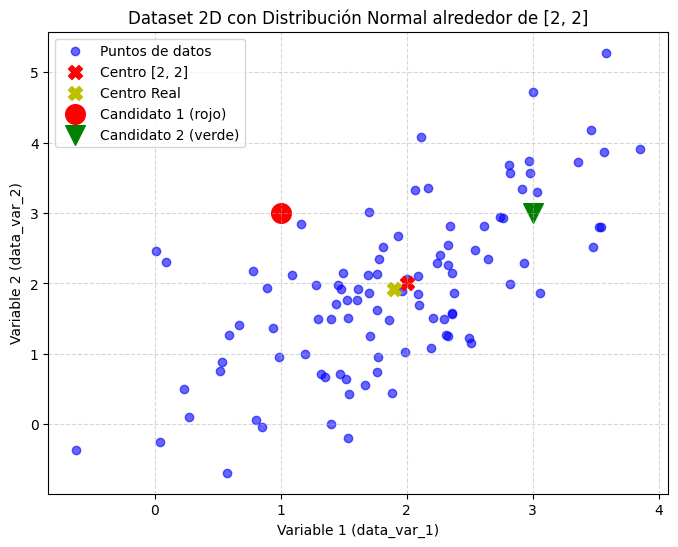

Centro real del cluster: x=1.90, y=1.92
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00
--- Visualización: Relación Cuadrática ---


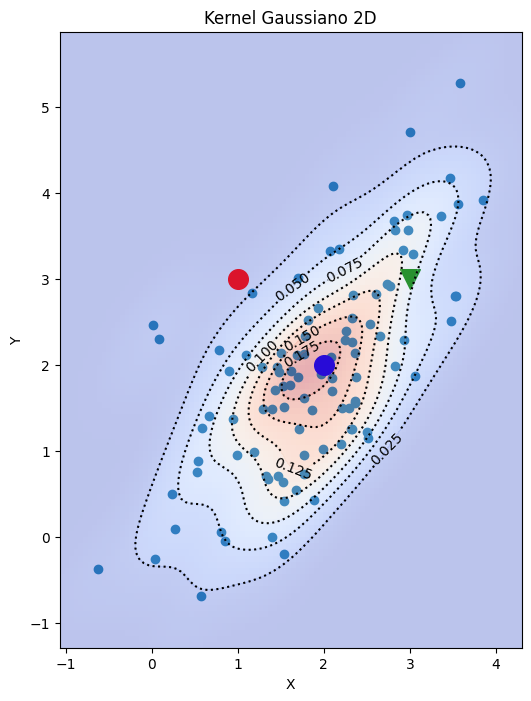

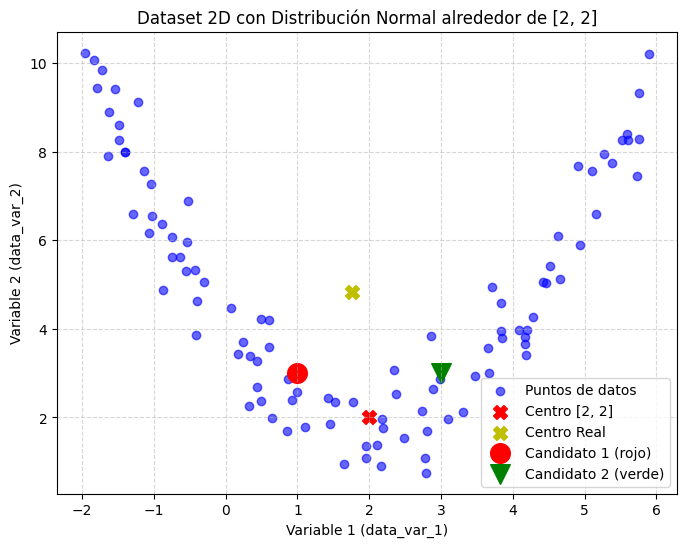

Centro real del cluster: x=1.76, y=4.83
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


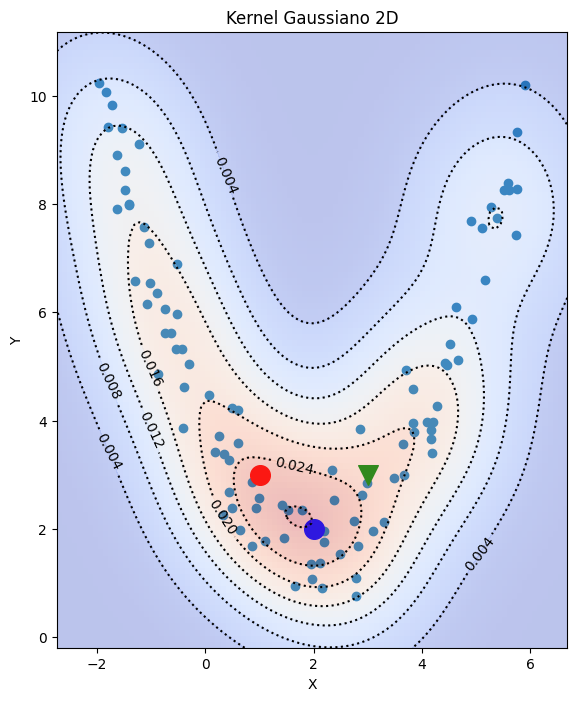

In [8]:
# TODO 1.1 crear y vizualizar el dataset con relacion lineal y con relacion cuadratica
dxr, dyr = cargar_datasetRelacionLineal(factor=np.array([1, 0.9]), n_data_points=100, ds_center=ds_center) #Completado

print("--- Visualización: Relación Lineal ---")
visualize_scatter(dxr, dyr, ds_center, c1, c2)
visualize_dataset(dxr, dyr, ds_center, c1, c2)

dx2, dy2 = cargar_datasetRelacionCuadratica(coeficientes=np.array([0.5, -2, 4]), n_data_points=100, rango_x=(-2, 6)) #Completado

print("--- Visualización: Relación Cuadrática ---")
visualize_scatter(dx2, dy2, ds_center, c1, c2)
visualize_dataset(dx2, dy2, ds_center, c1, c2)

--- Visualización: Dataset Grande ---


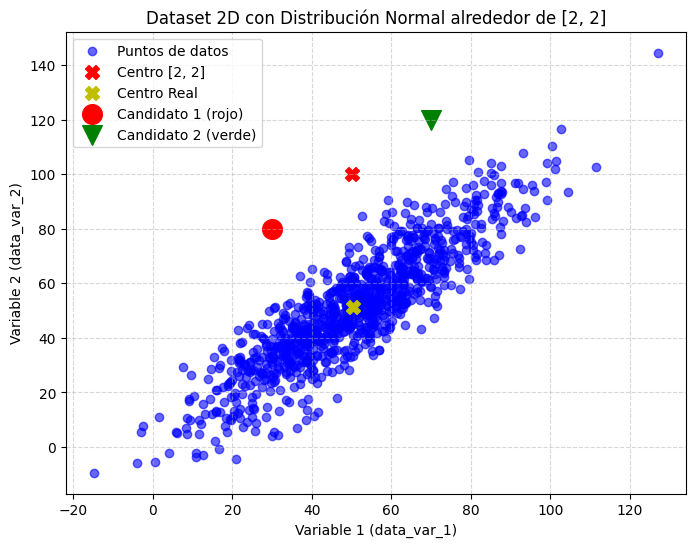

Centro real del cluster: x=50.39, y=51.10
Centro del cluster utilizado para el ejemplo: x=50.00, y=100.00


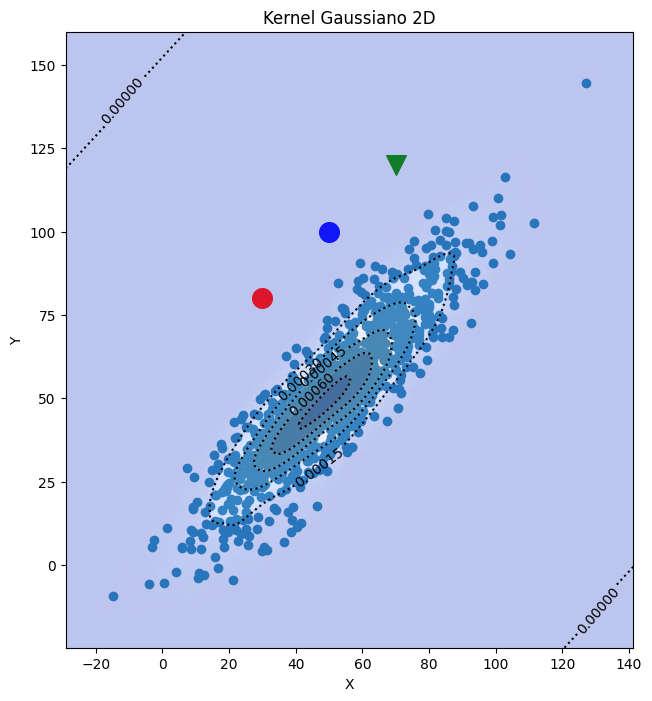

In [13]:
# Dataset grande
dxGrande, dyGrande =cargar_datasetRelacionLineal([20,10], 1000, [50,100])

ds_center_grande = np.array([50, 100])

dxGrande, dyGrande = cargar_datasetRelacionLineal(factor=np.array([20, 10]), n_data_points=1000,ds_center=ds_center_grande)

c1_grande = np.array([30, 80])
c2_grande = np.array([70, 120])

print("--- Visualización: Dataset Grande ---")
visualize_scatter(dxGrande, dyGrande, ds_center_grande, c1_grande, c2_grande)
visualize_dataset(dxGrande, dyGrande, ds_center_grande, c1_grande, c2_grande)

# 🎯 **EJ 2: IDENTIFIQUE QUE TAN DEPENDIENTES SON LOS DATASETS**

In [15]:
# TODO 2.1 : Use la covarianza para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr}, {dx2, dy2} y {dxGrande, dyGrande}
# su codigo aqui np.cov

# 1. Dataset Distribución Normal
cov_normal = np.cov(dx, dy)
print(f'Covarianza dataset con distribución normal:\n{cov_normal}\n')

# 2. Dataset Relación Lineal
cov_lineal = np.cov(dxr, dyr)
print(f'Covarianza dataset con relación lineal :\n{cov_lineal}\n')

# 3. Dataset Grande
cov_grande = np.cov(dxGrande, dyGrande)
print(f'Covarianza dataset con relación lineal Grande:\n{cov_grande}\n')

# 4. Dataset Relación Cuadrática
cov_cuadratica = np.cov(dx2, dy2)
print(f'Covarianza dataset con relación cuadratica:\n{cov_cuadratica}\n')

Covarianza dataset con distribución normal:
[[0.87173739 0.08985489]
 [0.08985489 0.76444418]]

Covarianza dataset con relación lineal :
[[0.82476989 0.71843112]
 [0.71843112 1.34877479]]

Covarianza dataset con relación lineal Grande:
[[383.54554143 375.65364293]
 [375.65364293 467.25326789]]

Covarianza dataset con relación cuadratica:
[[ 5.66399678 -0.85694613]
 [-0.85694613  6.89531371]]



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

- ¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

El dataset grande tiene una mayor dependencia lineal, dxGrande, dyGrande son simplemente los datos de dx, dy multiplicados por un escalar entonces si uno aumenta por ende el otro igual.

- ¿Cual es el problema que tiene la covarianza?

El principal problema de la covarianza es que no está normalizada y depende de la escala de los datos.

In [17]:
# TODO 2.2: Use el coeficiente de correlación de Pearson para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr} y {dxGrande, dyGrande}
# su codigo aqui np.corrcoef

import numpy as np

# 1. Correlación para {dx, dy}
corr_matrix_xy = np.corrcoef(dx, dy)
r_xy = corr_matrix_xy[0, 1]

# 2. Correlación para {dxr, dyr}
corr_matrix_r = np.corrcoef(dxr, dyr)
r_r = corr_matrix_r[0, 1]

# 3. Correlación para {dxGrande, dyGrande}
corr_matrix_grande = np.corrcoef(dxGrande, dyGrande)
r_grande = corr_matrix_grande[0, 1]

print(f"Correlación (dx, dy): {r_xy}")
print(f"Correlación (dxr, dyr): {r_r}")
print(f"Correlación (dxGrande, dyGrande): {r_grande}")

Correlación (dx, dy): 0.11007178534016056
Correlación (dxr, dyr): 0.6811598115102176
Correlación (dxGrande, dyGrande): 0.8873663623612619


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

- ¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

El dataset grande, {dx, dy} como el dataset {dxGrande, dyGrande} tienen la misma mayor dependencia lineal.

- ¿Que medida es mas facil de interpretar para identificar la dependencia entre dos variables de un dataset?

La medida más fácil de interpretar es el Coeficiente de Correlación de Pearson.
Porque está normalizado en un rango fijo de -1 a 1, siendo valores cercanos a 1 más dependencia lineal positiva y -1 dependencia lineal negativa.

# 🎯 **EJ 3: CREE LAS FUNCIONES DE LAS MEDIDAS DE DISIMILITUD**

In [ ]:
#  TODO 3.1 completar el codigo de las funciones de las siguientes medidas de disimilitud:
#  Distancia Euclidiana, Distancia Manhattan, Distancia Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
#  En scipy.spatial.distance tenemos disponibles las distancias minkowski, mahalanobis, jaccard, hamming, euclidean, cosine, entre otras.
#  En numpy tenemos la norma p =  np.linalg.norm

In [18]:
def distancia_euclidiana(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord= 1)
   print(f'Distancia euclidiana del punto {p1} al punto {p2} = {dist}')
   return dist

In [19]:
def distancia_manhattan(p1, p2):
   dist =  np.linalg.norm(np.array(p1) - np.array(p2), ord=1) # COMPLETADO
   print(f'Distancia manhattan del punto {p1} al punto {p2} = {dist}')
   return dist

In [21]:
# ← COMPLETAR Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard

# Distancia Chebyshev
def distancia_chebyshev(p1, p2):
    dist = np.linalg.norm(np.array(p1) - np.array(p2), ord=np.inf)
    print(f'Distancia Chebyshev del punto {p1} al punto {p2} = {dist}')
    return dist

# Similitud de Coseno
def similitud_coseno(p1, p2):
    dist = distance.cosine(p1, p2)
    similitud = 1 - dist
    print(f'Similitud de Coseno entre {p1} y {p2} = {similitud}')
    return similitud


# Distancia Mahalanobis
def distancia_mahalanobis(p1, p2, matriz_cov_inv):
    dist = distance.mahalanobis(p1, p2, matriz_cov_inv)
    print(f'Distancia Mahalanobis entre {p1} y {p2} = {dist}')
    return dist

# Distancia Jaccard
def distancia_jaccard(p1, p2):
    dist = distance.jaccard(p1, p2)
    print(f'Distancia Jaccard entre {p1} y {p2} = {dist}')
    return dist

In [26]:
from scipy.spatial import distance
import numpy as np

# 1. PRIMER DATASET
print('Distancias primer dataset:\n')
ds_center = np.array([np.mean(dx), np.mean(dy)]) # COMPLETADO, calcule el centro del primer dataset

# PREPARACIÓN MAHALANOBIS
cov_1 = np.cov(np.vstack((dx, dy)))
inv_cov_1 = np.linalg.inv(cov_1)

dist_euc1 = distancia_euclidiana(c1, ds_center)
dist_euc2 = distancia_euclidiana(c2, ds_center)

# COMPLETADO, el resto de distancias

dist_man1 = distancia_manhattan(c1, ds_center)
dist_man2 = distancia_manhattan(c2, ds_center)

# Chebyshev
dist_che1 = distancia_chebyshev(c1, ds_center)
dist_che2 = distancia_chebyshev(c2, ds_center)

# Coseno
dist_cos1 = similitud_coseno(c1, ds_center)
dist_cos2 = similitud_coseno(c2, ds_center)

# Mahalanobis
dist_mah1 = distancia_mahalanobis(c1, ds_center, inv_cov_1)
dist_mah2 = distancia_mahalanobis(c2, ds_center, inv_cov_1)

# Jaccard
dist_jac1 = distancia_jaccard(c1, ds_center)
dist_jac2 = distancia_jaccard(c2, ds_center)

# 2. SEGUNDO DATASET {dxr, dyr}
print('\nDistancias segundo dataset:\n')

# COMPLETADO, calcule el centro del segundo dataset
dsr_center = np.array([np.mean(dxr), np.mean(dyr)])

# PREPARACIÓN MAHALANOBIS
cov_r = np.cov(np.vstack((dxr, dyr)))
inv_cov_r = np.linalg.inv(cov_r)

dist_euc1_r = distancia_euclidiana(c1, dsr_center)
dist_euc2_r = distancia_euclidiana(c2, dsr_center)

dist_man1_r = distancia_manhattan(c1, dsr_center)
dist_man2_r = distancia_manhattan(c2, dsr_center)

dist_mah1_r = distancia_mahalanobis(c1, dsr_center, inv_cov_r)
dist_mah2_r = distancia_mahalanobis(c2, dsr_center, inv_cov_r)

dist_che1_r = distancia_chebyshev(c1, dsr_center)
dist_che2_r = distancia_chebyshev(c2, dsr_center)

dist_cos1_r = similitud_coseno(c1, dsr_center)
dist_cos2_r = similitud_coseno(c2, dsr_center)

dist_jac1_r = distancia_jaccard(c1, dsr_center)
dist_jac2_r = distancia_jaccard(c2, dsr_center)


# 3. TERCER DATASET
print('\nDistancias tercer dataset (Grande):\n')

dsG_center = np.array([np.mean(dxGrande), np.mean(dyGrande)])

# 2. Preparación Mahalanobis
cov_G = np.cov(np.vstack((dxGrande, dyGrande)))
inv_cov_G = np.linalg.inv(cov_G)

dist_euc1_G = distancia_euclidiana(c1, dsG_center)
dist_euc2_G = distancia_euclidiana(c2, dsG_center)

dist_man1_G = distancia_manhattan(c1, dsG_center)
dist_man2_G = distancia_manhattan(c2, dsG_center)

dist_che1_G = distancia_chebyshev(c1, dsG_center)
dist_che2_G = distancia_chebyshev(c2, dsG_center)

dist_cos1_G = similitud_coseno(c1, dsG_center)
dist_cos2_G = similitud_coseno(c2, dsG_center)

dist_mah1_G = distancia_mahalanobis(c1, dsG_center, inv_cov_G)
dist_mah2_G = distancia_mahalanobis(c2, dsG_center, inv_cov_G)

dist_jac1_G = distancia_jaccard(c1, dsG_center)
dist_jac2_G = distancia_jaccard(c2, dsG_center)


Distancias primer dataset:

Distancia euclidiana del punto [1 3] al punto [1.77452609 2.01778087] = 1.7567452242759072
Distancia euclidiana del punto [3 3] al punto [1.77452609 2.01778087] = 2.207693034788188
Distancia manhattan del punto [1 3] al punto [1.77452609 2.01778087] = 1.7567452242759072
Distancia manhattan del punto [3 3] al punto [1.77452609 2.01778087] = 2.207693034788188
Distancia Chebyshev del punto [1 3] al punto [1.77452609 2.01778087] = 0.9822191295320475
Distancia Chebyshev del punto [3 3] al punto [1.77452609 2.01778087] = 1.2254739052561403
Similitud de Coseno entre [1 3] y [1.77452609 2.01778087] = 0.9212201531060056
Similitud de Coseno entre [3 3] y [1.77452609 2.01778087] = 0.9979490827692092
Distancia Mahalanobis entre [1 3] y [1.77452609 2.01778087] = 1.4770847358703076
Distancia Mahalanobis entre [3 3] y [1.77452609 2.01778087] = 1.640977445812973
Distancia Jaccard entre [1 3] y [1.77452609 2.01778087] = 0.0
Distancia Jaccard entre [3 3] y [1.77452609 2.01778

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

- ¿Qué medidas de disimilitud son de un punto a otro punto?
Distancia Euclidiana: La línea recta física.

Distancia Manhattan: La ruta en cuadrícula.

Distancia Chebyshev: La máxima diferencia en un solo eje.

Similitud de Coseno: El ángulo entre vectores.

Jaccard: La intersección sobre la unión.

- ¿Qué medidas de disimilitud son de un punto a una distribución?

Distancia de Mahalanobis: Para calcular la distancia entre el punto A y el punto B (o el centro) se necesita obligatoriamente la Matriz de Covarianza del dataset.

- ¿La distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos?

Si, la distancia de Mahalanobis se adapta a la forma de la distribución real de los datos.

# 🔄 **EJ 4: MATRIZ DE DISTANCIAS**

Cree un metodo que sea capaz de calcular la matriz de distancias de todos los puntos de un dataset, recive como parametros la medida de disimilitud y en algunos casos la matriz de covarianza

In [32]:
import itertools as it
#  TODO 4.1 completar el codigo
def matriz_distancias(X, distancia, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))
    for pair in it.product(np.arange(n_samples), repeat=2):
        if mC is not None:
            mD[pair] = distancia(X[pair[0]], X[pair[1]], mC) # Completado
        else:
            mD[pair] = distancia(X[pair[0]], X[pair[1]]) # Completado
    return mD

In [33]:
# ← COMPLETAR calcule y grafique la matriz de distancias para todos los datasets y use la medida de disimilitud euclidiana y mahalanobis
# calculamos primero la matriz de covarianzas

# Preparar datos para prueba (primeros 20 puntos para que no sea lento)
X_test = np.vstack((dx[:20], dy[:20])).T
mC_test = np.cov(X_test.T)

# Calcular
Ma_euclidea = matriz_distancias(X_test, distancia_euclidiana)
Ma_mahalanobis = matriz_distancias(X_test, distancia_mahalanobis, mC_test)


Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 1.344144703993529
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.1519803547902132
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.3139080228428655
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.4377830808357248
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 1.3380472596818171
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 2.245800155113592
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.9040169213876856
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 0.9733680009549539
Distancia euclidiana del punto [2.49

Text(0.5, 1.0, 'Mahalanobis')

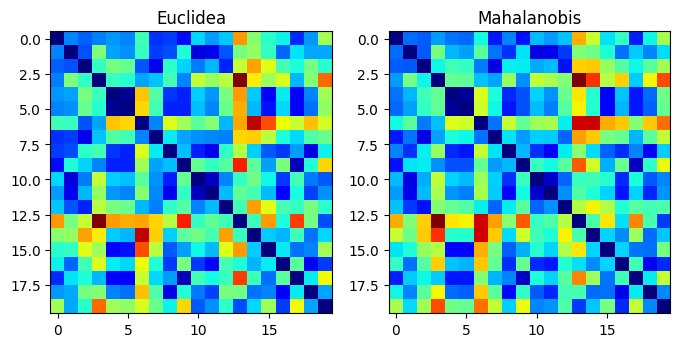

In [34]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Ma_euclidea, cmap='jet')
ax[0].set_title('Euclidea')
ax[1].imshow(Ma_mahalanobis, cmap='jet')
ax[1].set_title('Mahalanobis')

In [35]:
#Hasta ahora hemos visto todo disimilitudes (distancias). ¿Y si quisiéramos una medida de similitud?
def matriz_similitud(X, distancia, mC=None):
    if mC is not None:
        mD = matriz_distancias(X, distancia, mC)
    else:
        mD = matriz_distancias(X, distancia)
    # complete
    return 1 / (1 + mD) # Completado #

Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 1.344144703993529
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.1519803547902132
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.3139080228428655
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.4377830808357248
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 1.3380472596818171
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 2.245800155113592
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.9040169213876856
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 0.9733680009549539
Distancia euclidiana del punto [2.49

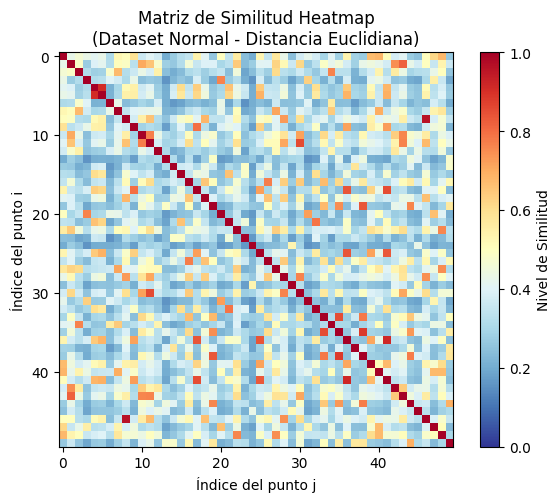

In [38]:
# Complete 4.3 Grafique la matriz de similitud

import matplotlib.pyplot as plt
import numpy as np

mS_euclidiana = matriz_similitud(X1, distancia_euclidiana)

plt.figure(figsize=(6, 5))

plt.imshow(mS_euclidiana, cmap='RdYlBu_r', origin='upper', vmin=0, vmax=1, interpolation='nearest')

plt.colorbar(label='Nivel de Similitud')
plt.title('Matriz de Similitud Heatmap\n(Dataset Normal - Distancia Euclidiana)')
plt.xlabel('Índice del punto j')
plt.ylabel('Índice del punto i')

plt.tight_layout()
plt.show()

# ✅ **RESULTADOS:**
¿Cual grafico es mas facil de interpretar: el de una medida de disimilitud o de similitud?

El gráfico de la medida de similitud por su rango de 0 a 1 y además por estar como mapa de calor


# 🚀 ¡TALLER FINALIZADO!"